In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import numpy as np

In [7]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) chrome/100.0.4896.60 Safari/537.36",
    "X-Amzn-Trace-Id": "Root=1-6245a2b6-1cf3be6e16b13acf418c83b2"}

In [8]:
#scraping from the website
data = {"title":[], "author":[], "review":[], "price":[], "ratings":[]}
for a in range(1,76):
  pages = requests.get(f'https://www.amazon.com/s?k=amazon+shopping+online&i=stripbooks&rh=n%3A283155&dc',headers=headers)

  soup = BeautifulSoup(pages.content, "html.parser")


  title = soup.find_all('h2',{"class": "a-size_mini a_spacing_none a_color_base s_line_clamp_2"})
  for titles in title:
    data["title"].append(titles.text)

  author = soup.find_all('div', {'class': "a_row a_size_base a_color_secondary"})
  for a in author:
    for b in a.find_all('a', {'class': "a_row a_size_base a_link_normal s_underline_text s_underline_link_text s_link_style"}):
      data['author'].append(b.text)

  review = soup.find_all('div', {"class": "a_row a_size_small"})
  for i in review:
    for j in i.find_all('span', {"class": "a_size_base"}):
      data["review"].append(j.text)
  
  year = soup.find_all('div', {'class': "a_row"})
  for a in year:
    for b in a.find_all('span', {'class': "a_size_base a_color_secondary a_text_normal"}):
      data['year'].append(b.text)
  
  price = soup.find_all('div', {'class': "a_row a_size_base a_color_base"})
  for a in price:
    for b in a.find_all('span', {'class': "a_price_whole"}):
      data['price'].append(b.text)
  
  ratings = soup.find_all('div', {'class': "a_row a_size_small"})
  for a in ratings:
    for b in a.find_all('span', {'class': "a_declarative"}):
      data['ratings'].append(b.text)

In [9]:
#storing the data in a dataframe
books = pd.DataFrame.from_dict(data, orient='index')
books.T

,title,author,review,price,ratings


In [10]:
df = pd.read_csv("/content/bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [11]:
df.shape

(550, 7)

In [12]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [14]:
corr=df.corr()
corr

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


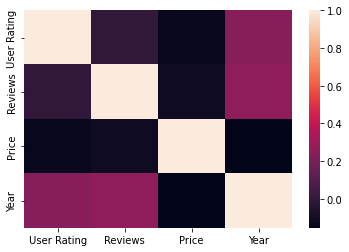

In [15]:
sns.heatmap(corr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1ffcb7f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1ffcc3640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1ffcb7be0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd1ffcc3d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1ffccb040>,
 'means': []}

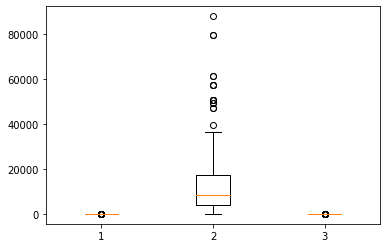

In [16]:
plt.boxplot([df['User Rating'],df['Reviews'],df['Price']])

In [17]:
import sklearn
# IQR
Q1 = np.percentile(df['Reviews'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['Reviews'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Reviews'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Reviews'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (550, 7)
New Shape:  (533, 7)


In [18]:
df2 = df[(df['Year'] >= 2009) & (df['Year'] <= 2019)]
df2

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [19]:
#Top books according to reviews
df2_sorted = df2.sort_values("Price",ascending=False)
df2_sorted

,Name,Author,User Rating,Reviews,Price,Year,Genre
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
...,...,...,...,...,...,...,...
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction


In [20]:
Top_priced_books = df2[['Name','Price']]
Top_priced_books

,Name,Price
0,10-Day Green Smoothie Cleanse,8
1,11/22/63: A Novel,22
2,12 Rules for Life: An Antidote to Chaos,15
3,1984 (Signet Classics),6
4,"5,000 Awesome Facts (About Everything!) (Natio...",12
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),8
546,You Are a Badass: How to Stop Doubting Your Gr...,8
547,You Are a Badass: How to Stop Doubting Your Gr...,8
548,You Are a Badass: How to Stop Doubting Your Gr...,8


In [21]:
Top_priced_books_sorted_desc = Top_priced_books.sort_values('Price',ascending=False)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


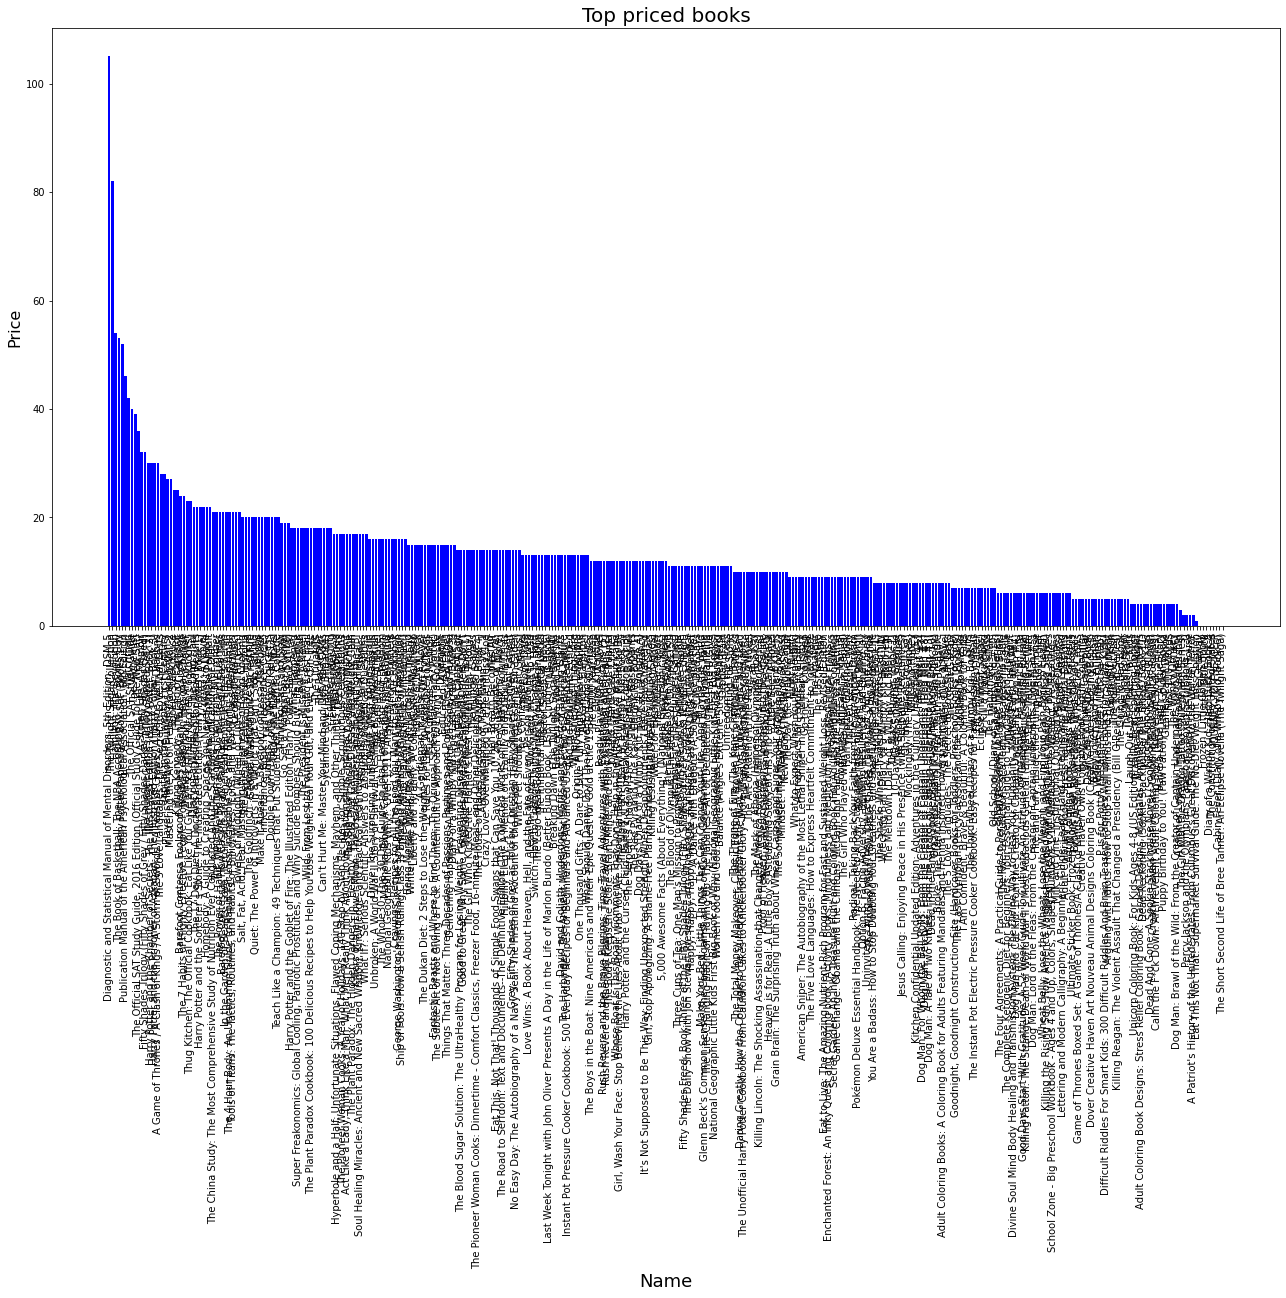

In [22]:
fig = plt.figure(figsize=(22,11))
plt.bar(Top_priced_books_sorted_desc['Name'],Top_priced_books_sorted_desc['Price'],color='blue')
plt.title('Top priced books', fontsize=20)
plt.xlabel('Name',fontsize=18)
plt.ylabel('Price',fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [23]:
top_reviewed_books = df2[['Name', 'Reviews']]
top_reviewed_books

,Name,Reviews
0,10-Day Green Smoothie Cleanse,17350
1,11/22/63: A Novel,2052
2,12 Rules for Life: An Antidote to Chaos,18979
3,1984 (Signet Classics),21424
4,"5,000 Awesome Facts (About Everything!) (Natio...",7665
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),9413
546,You Are a Badass: How to Stop Doubting Your Gr...,14331
547,You Are a Badass: How to Stop Doubting Your Gr...,14331
548,You Are a Badass: How to Stop Doubting Your Gr...,14331


In [24]:
top_reviewed_books_sorted_desc = top_reviewed_books.sort_values('Reviews',ascending=False)
top_reviewed_books_sorted_desc

,Name,Reviews
21,All the Light We Cannot See,36348
20,All the Light We Cannot See,36348
338,The Alchemist,35799
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,33844
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,33844
...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,440
512,True Compass: A Memoir,438
121,George Washington's Sacred Fire,408
300,Soul Healing Miracles: Ancient and New Sacred ...,220


In [25]:
topbooks = top_reviewed_books_sorted_desc.nlargest(10,['Reviews'])
topbooks

,Name,Reviews
21,All the Light We Cannot See,36348
20,All the Light We Cannot See,36348
338,The Alchemist,35799
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,33844
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,33844
408,The Hunger Games (Book 1),32122
407,The Hunger Games,32122
409,The Hunger Games (Book 1),32122
490,The Wonky Donkey,30183
491,The Wonky Donkey,30183


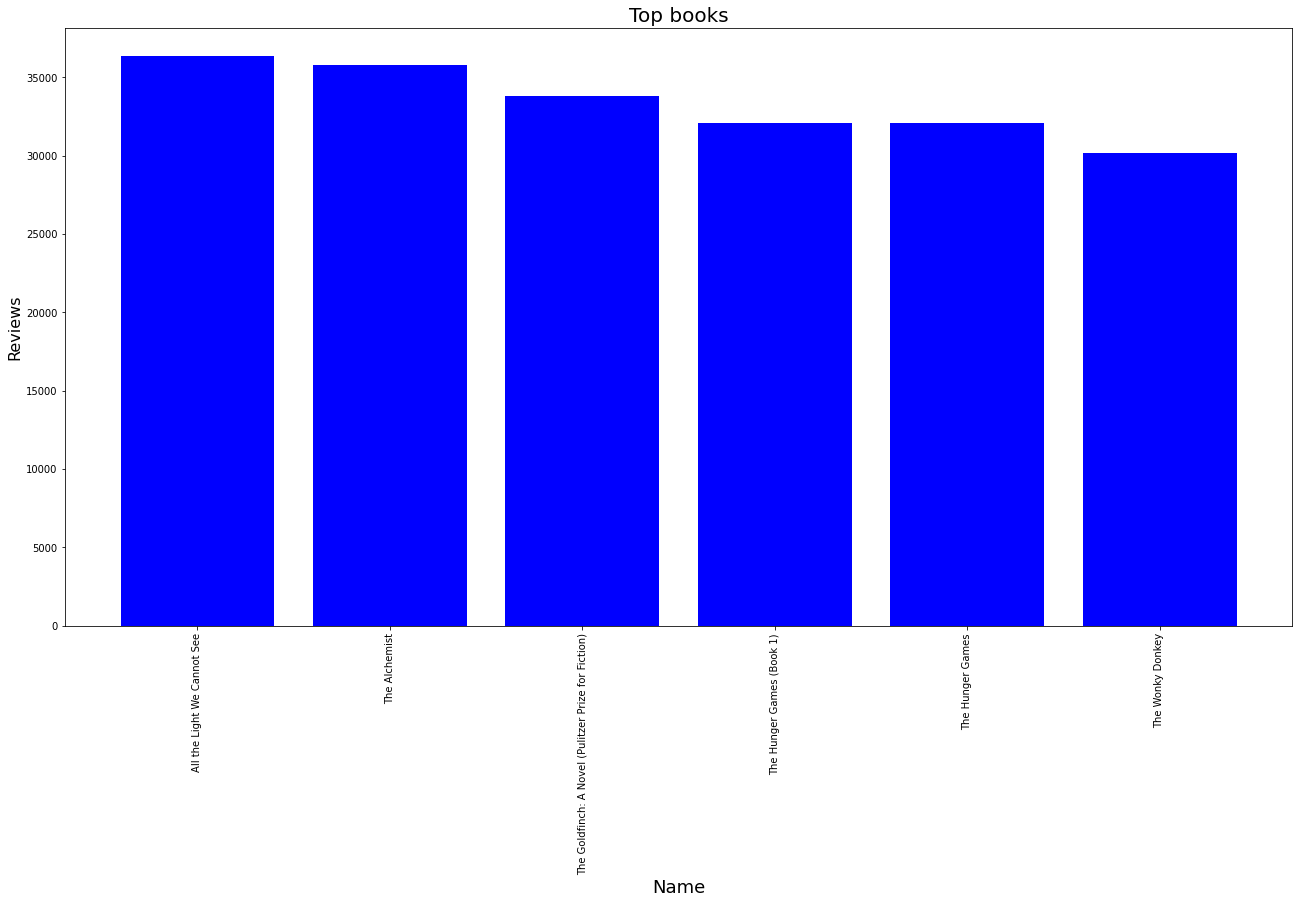

In [26]:
fig = plt.figure(figsize=(22,11))
plt.bar(topbooks['Name'],topbooks['Reviews'],color='blue')
plt.title('Top books', fontsize=20)
plt.xlabel('Name',fontsize=18)
plt.ylabel('Reviews',fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [27]:
Authors = df2['Author'].value_counts()
Authors = Authors.to_frame().reset_index()
Authors = Authors.head(10)
Authors 

,index,Author
0,Jeff Kinney,12
1,Rick Riordan,11
2,Gary Chapman,11
3,Suzanne Collins,11
4,American Psychological Association,10
5,Gallup,9
6,Dr. Seuss,9
7,Rob Elliott,8
8,Dav Pilkey,7
9,Stephenie Meyer,7


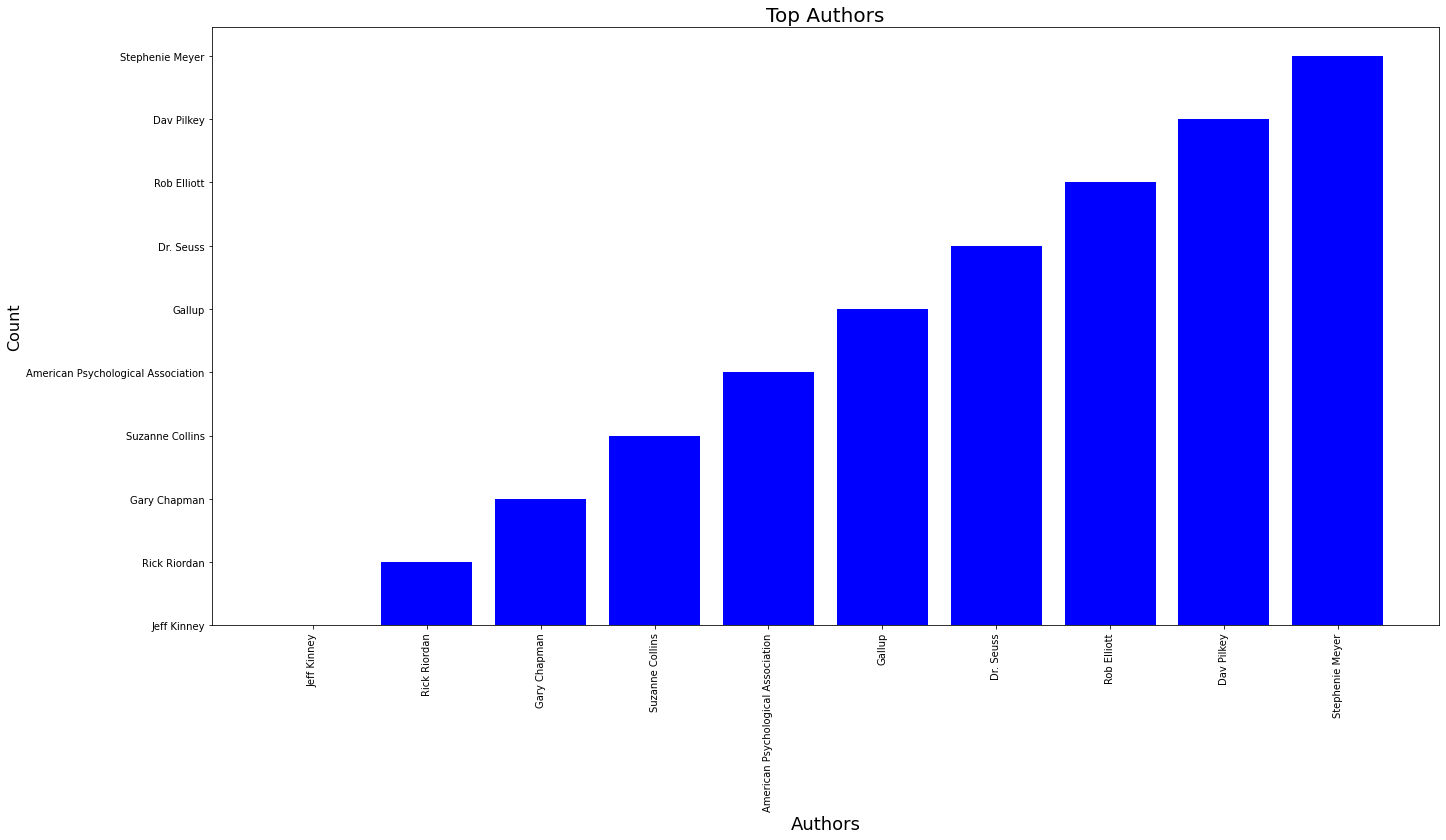

In [28]:
#chat showing authors and numbers of books they have
fig = plt.figure(figsize=(22,11))
plt.bar(Authors['index'],Authors['index'],color='blue')
plt.title('Top Authors', fontsize=20)
plt.xlabel('Authors',fontsize=18)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=90)
plt.show()